In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from sklearn.metrics import classification_report
import torch

In [2]:
import csv
import os
import shutil

# Define the base path where the folders containing audio files are located
base_path = 'openmic-2018/audio/'

# Define the destination path where you want to move the files
train_destination_path = 'dataset/train/'
test_destination_path = 'dataset/test/'

# Ensure the destination directory exists
# if not os.path.exists(train_destination_path):
#     os.makedirs(train_destination_path)
# if not os.path.exists(test_destination_path):
#     os.makedirs(test_destination_path)

# # Open and read the CSV file
# with open('openmic-2018/partitions/split01_train.csv') as csvfile:
#     filereader = csv.reader(csvfile)
#     for row in filereader:
#         # Extract the file name from the row (assuming there's no header and each row contains just the file name)
#         file_name = row[0]

#         # Construct the folder name from the first 3 characters of the file name
#         folder_name = file_name[:3]

#         # Construct the source path
#         source_path = os.path.join(base_path, folder_name, file_name + '.ogg')

#         # Construct the destination path
#         dest_file_path = os.path.join(train_destination_path, file_name + '.ogg')

#         # Move the file
#         shutil.move(source_path, dest_file_path)

#         print(f"Moved {source_path} to {dest_file_path}")
        
# # Open and read the CSV file
# with open('openmic-2018/partitions/split01_test.csv') as csvfile:
#     filereader = csv.reader(csvfile)
#     for row in filereader:
#         # Extract the file name from the row (assuming there's no header and each row contains just the file name)
#         file_name = row[0]

#         # Construct the folder name from the first 3 characters of the file name
#         folder_name = file_name[:3]

#         # Construct the source path
#         source_path = os.path.join(base_path, folder_name, file_name + '.ogg')

#         # Construct the destination path
#         dest_file_path = os.path.join(test_destination_path, file_name + '.ogg')

#         # Move the file
#         shutil.move(source_path, dest_file_path)

#         print(f"Moved {source_path} to {dest_file_path}")


In [3]:
#print how many files are in the train and test folders
print(len(os.listdir(train_destination_path)))
print(len(os.listdir(test_destination_path)))

14915
5085


In [4]:
# amplitude_train_path = 'amplitude_spectrogram/train/'
# amplitude_test_path = 'amplitude_spectrogram/test/'

In [5]:

# if not os.path.exists(amplitude_train_path):
#     os.makedirs(amplitude_train_path)
# # take only the first 1000 files
# for file in os.listdir(train_destination_path)[:100]:
#     y, sr = librosa.load(train_destination_path + file)
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
#     plt.figure(figsize=(6, 4))
#     img = librosa.display.specshow(D, sr=sr)
#     #remove .ogg extension from the file name
#     plt.savefig(amplitude_train_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
#     plt.close()

In [6]:
# #load the image from the amplitude_spectrogram folder
# img = plt.imread(amplitude_train_path + "000046_3840.png")
# # img = img[:,:,:3]
# plt.imshow(img)
# #show the shape of the image
# print(img.shape)

In [7]:
# if not os.path.exists(amplitude_test_path):
#     os.makedirs(amplitude_test_path)
# for file in os.listdir(test_destination_path)[:10]:
#     y, sr = librosa.load(test_destination_path + file)
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
#     plt.figure(figsize=(6, 4))
#     img = librosa.display.specshow(D, sr=sr)
#     #remove .ogg extension from the file name
#     plt.savefig(amplitude_test_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
#     plt.close()


In [8]:
power_train_path = 'power_spectrogram/train/'
power_test_path = 'power_spectrogram/test/'

In [14]:
if not os.path.exists(power_train_path):
    os.makedirs(power_train_path)
for file in os.listdir(train_destination_path):
    y, sr = librosa.load(train_destination_path + file)
    # Compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(6, 4))
    img = librosa.display.specshow(log_S, sr=sr)

    #remove .ogg extension from the file name
    plt.savefig(power_train_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
    plt.close()


In [15]:
print(len(os.listdir(power_train_path)))

14915


(308, 465, 4)


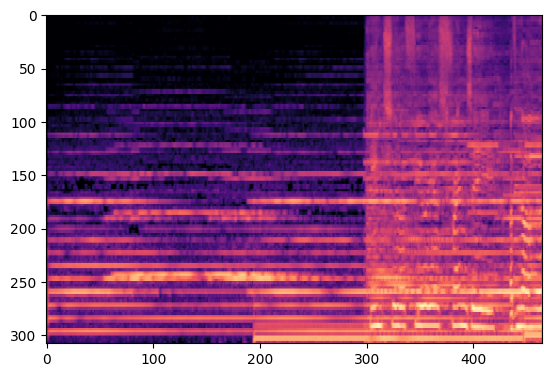

In [16]:
#load the image in the power_spectrogram folder
img = plt.imread(power_train_path + '/000046_3840.png')
# img = img[:,:,:3]
plt.imshow(img)
#print the shape of the image
print(img.shape)

In [32]:
if not os.path.exists(power_test_path):
    os.makedirs(power_test_path)
for file in os.listdir(test_destination_path)[2500:]:
    y, sr = librosa.load(test_destination_path + file)
    # Compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(6, 4))
    img = librosa.display.specshow(log_S, sr=sr)
    #remove .ogg extension from the file name
    plt.savefig(power_test_path + file[:-4] + ".png", bbox_inches='tight', pad_inches = 0)
    plt.close()

In [33]:
print(len(os.listdir(power_test_path)))

5085


(308, 465, 4)


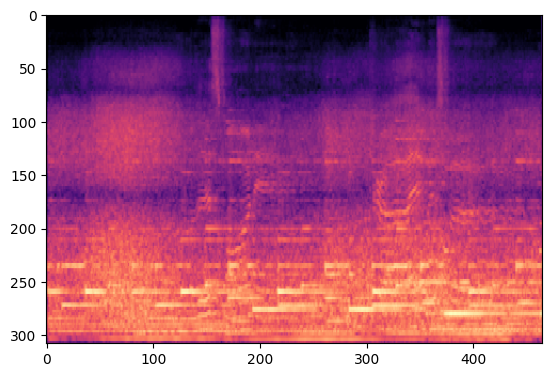

In [34]:
#load the image in the power_spectrogram folder
img = plt.imread(power_test_path + '/000178_3840.png')
# img = img[:,:,:3]
plt.imshow(img)
#print the shape of the image
print(img.shape)

In [18]:
DATA_ROOT = './openmic-2018'
OPENMIC = np.load(os.path.join(DATA_ROOT, 'openmic-2018.npz'), allow_pickle=True)
print(list(OPENMIC.keys()))

['X', 'Y_true', 'Y_mask', 'sample_key']


In [19]:
Y_true, Y_mask, sample_key = OPENMIC['Y_true'], OPENMIC['Y_mask'], OPENMIC['sample_key']
print(Y_true.shape, Y_mask.shape, sample_key.shape)

(20000, 20) (20000, 20) (20000,)


In [20]:
split_train = pd.read_csv(os.path.join(DATA_ROOT, 'partitions/split01_train.csv'), 
                          header=None)
split_test = pd.read_csv(os.path.join(DATA_ROOT, 'partitions/split01_test.csv'), 
                         header=None)
print(split_train.shape, split_test.shape)
print(split_train.head())

(14915, 1) (5085, 1)
               0
0    000046_3840
1  000135_483840
2  000139_119040
3  000141_153600
4   000144_30720


In [25]:
print(os.listdir(power_train_path)[0][:-4])
print(split_train[0][0])
print(os.listdir(power_train_path)[0][:-4] == split_train[0][0])

000046_3840
000046_3840
True


In [26]:
# compare the sample_key in the split_train with file names in the power_spectrogram/train folder
i = 0
k = 0
for file in os.listdir(power_train_path):
    if file[:-4] == split_train[0][i]:
        k += 1
    i += 1
print(k)

14915


In [35]:
# compare the sample_key in the split_train with file names in the power_spectrogram/train folder
i = 0
k = 0
for file in os.listdir(power_test_path):
    if file[:-4] == split_test[0][i]:
        k += 1
    i += 1
print(k)

5085


In [38]:
train_set = []
test_set = []
for i in range(len(split_train)):
    train_set.append(split_train[0][i])
for i in range(len(split_test)):
    test_set.append(split_test[0][i])
print(len(train_set))
print(len(test_set))

14915
5085


In [39]:
print(train_set)
print(test_set)

['000046_3840', '000135_483840', '000139_119040', '000141_153600', '000144_30720', '000145_172800', '000154_288000', '000182_145920', '000189_207360', '000190_126720', '000195_280320', '000201_168960', '000202_142080', '000203_7680', '000205_61440', '000208_195840', '000211_49920', '000212_211200', '000237_34560', '000238_226560', '000247_76800', '000248_157440', '000250_26880', '000252_42240', '000253_126720', '000258_3840', '000282_207360', '000284_65280', '000384_161280', '000385_249600', '000386_65280', '000393_303360', '000395_119040', '000425_165120', '000438_245760', '000439_245760', '000442_157440', '000443_184320', '000446_26880', '000450_88320', '000473_138240', '000485_7680', '000493_42240', '000502_579840', '000504_203520', '000507_11520', '000512_7680', '000513_57600', '000525_119040', '000565_122880', '000575_69120', '000587_69120', '000601_38400', '000602_103680', '000605_3840', '000606_15360', '000607_76800', '000608_34560', '000615_326400', '000616_3840', '000640_49920

In [42]:

# These loops go through all sample keys, and save their row numbers
# to either idx_train or idx_test
#
# This will be useful in the next step for slicing the array data
idx_train, idx_test = [], []

for idx, n in enumerate(sample_key):
    if n in train_set:
        idx_train.append(idx)
    elif n in test_set:
        idx_test.append(idx)
    else:
        # This should never happen, but better safe than sorry.
        raise RuntimeError('Unknown sample key={}! Abort!'.format(sample_key[idx]))
        
# Finally, cast the idx_* arrays to numpy structures
idx_train = np.asarray(idx_train)
idx_test = np.asarray(idx_test)
print(idx_train.shape, idx_test.shape)

(14915,) (5085,)


In [43]:
Y_true_train = Y_true[idx_train]
Y_true_test = Y_true[idx_test]

Y_mask_train = Y_mask[idx_train]
Y_mask_test = Y_mask[idx_test]

print(Y_true_train.shape, Y_true_test.shape)
print(Y_mask_train.shape, Y_mask_test.shape)

(14915, 20) (5085, 20)
(14915, 20) (5085, 20)


In [23]:
for i in range(2):
    # print corresponding Y_true and Y_mask for each sample
    for j in range(20):
        print(Y_true[i][j], Y_mask[i][j])

0.5 False
0.5 False
0.5 False
0.5 False
0.17104999999999998 True
0.5 False
0.5 False
0.0 True
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.0 True
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.5 False
0.14705 True
0.5 False
0.5 False
0.0 True
0.5 False
0.5 False
1.0 True


In [24]:
for i in range(Y_true.shape[0]):
    for j in range(20):
        if Y_true[i][j] < 0.5:
            Y_true[i][j] = 1 - Y_true[i][j]

In [28]:
with open(os.path.join(DATA_ROOT, 'class-map.json'), 'r') as f:
    class_map = json.load(f)
print(class_map)

{'accordion': 0, 'banjo': 1, 'bass': 2, 'cello': 3, 'clarinet': 4, 'cymbals': 5, 'drums': 6, 'flute': 7, 'guitar': 8, 'mallet_percussion': 9, 'mandolin': 10, 'organ': 11, 'piano': 12, 'saxophone': 13, 'synthesizer': 14, 'trombone': 15, 'trumpet': 16, 'ukulele': 17, 'violin': 18, 'voice': 19}


In [29]:
print(sample_key[0])

000046_3840
